In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
veri="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
sutunlar=['MPG','Cylinders','Displacament','Horsepower','weight','Acceleration','Model Year','Origin']

In [3]:
veriseti=pd.read_csv(veri,names=sutunlar,skipinitialspace=True,na_values='?',comment='\t',sep=" ")

In [4]:
veriseti.head()

,MPG,Cylinders,Displacament,Horsepower,weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
veriseti.shape

(398, 8)

In [6]:
veriseti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacament  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
veriseti.isnull().sum()

MPG             0
Cylinders       0
Displacament    0
Horsepower      6
weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
print("EKSIK HORSEPOWERIN TUM SETE ORANI: ",veriseti['Horsepower'].isnull().sum()/veriseti.shape[0]*100)

EKSIK HORSEPOWERIN TUM SETE ORANI:  1.507537688442211


In [9]:
print("\nHORSEPOWER OZNITELIKLERININ ORTALAMASI: ",veriseti['Horsepower'].mean(skipna=True))


HORSEPOWER OZNITELIKLERININ ORTALAMASI:  104.46938775510205


In [10]:
veriler=veriseti.copy()

In [11]:
veriler['Horsepower'].fillna(veriler['Horsepower'].mean(skipna=True),inplace=True)

In [12]:
veriler.isnull().sum()

MPG             0
Cylinders       0
Displacament    0
Horsepower      0
weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<AxesSubplot:>

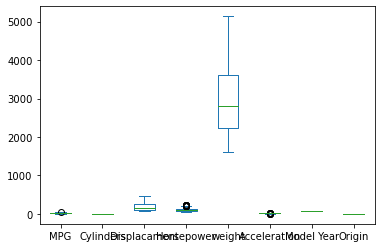

In [13]:
veriler.plot.box()

In [14]:
#KOKEN OLARAK VERILEN VERILERDE BIR KATEGORILKLESTIRME YAPMAMIZ GEREKIYOR. BUNUN NEDENI VERIYI GERCEK HAYATA DAHA UYGUN HALE GETIRMEKIR.
veriler['Origin'].unique()

array([1, 3, 2], dtype=int64)

In [15]:
veriler['Origin']=veriler['Origin'].map({1:'USA',2:'CHINA',3:'JAPAN'})

In [16]:
veriler.head()

,MPG,Cylinders,Displacament,Horsepower,weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [17]:
veriler=pd.get_dummies(veriler,columns=['Origin'],prefix="",prefix_sep="")

In [18]:
veriler.head()

,MPG,Cylinders,Displacament,Horsepower,weight,Acceleration,Model Year,CHINA,JAPAN,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [19]:
veriler.columns

Index(['MPG', 'Cylinders', 'Displacament', 'Horsepower', 'weight',
       'Acceleration', 'Model Year', 'CHINA', 'JAPAN', 'USA'],
      dtype='object')

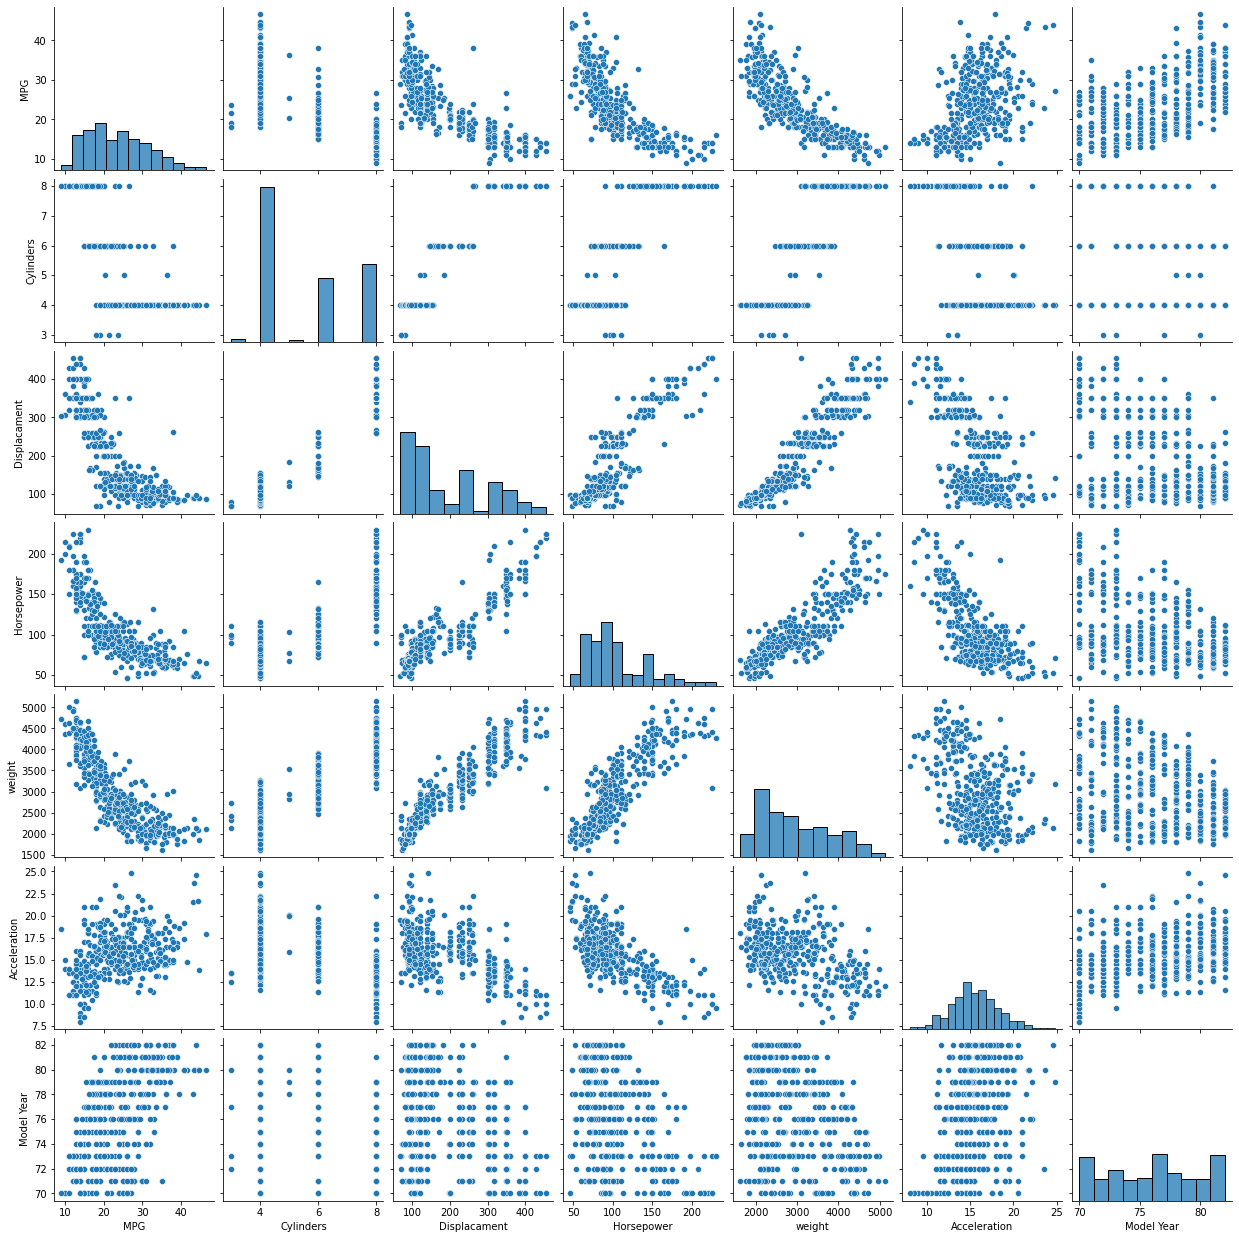

In [21]:
sns.pairplot(veriler[['MPG', 'Cylinders', 'Displacament', 'Horsepower', 'weight',
       'Acceleration', 'Model Year']])

In [22]:
egitim_seti=veriler.sample(frac=0.8,random_state=0)
test_seti=veriler.drop(egitim_seti.index)

In [23]:
veriler.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacament,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
CHINA,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
JAPAN,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
USA,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0


In [24]:
egitim_labels=egitim_seti.pop('MPG')
test_labels=test_seti.pop('MPG')

In [29]:
normalizer=layers.experimental.preprocessing.Normalization(axis=1)
model=tf.keras.models.Sequential(normalizer)

In [30]:
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [31]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [32]:
history=model.fit(egitim_seti,egitim_labels,epochs=100,validation_split=0.2,verbose=0)
history=history.history

In [34]:
model.evaluate(test_seti,test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 7.0110


7.010987758636475